In [2]:
! pip install matplotlib

  Using cached matplotlib-3.10.8-cp310-cp310-win_amd64.whl.metadata (52 kB)
  Using cached contourpy-1.3.2-cp310-cp310-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.1-cp310-cp310-win_amd64.whl.metadata (116 kB)
  Using cached kiwisolver-1.4.9-cp310-cp310-win_amd64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.3.2-py3-none-any.whl.metadata (5.8 kB)
Using cached matplotlib-3.10.8-cp310-cp310-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.2-cp310-cp310-win_amd64.whl (221 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.61.1-cp310-cp310-win_amd64.whl (1.6 MB)
Using cached kiwisolver-1.4.9-cp310-cp310-win_amd64.whl (73 kB)
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/

In [8]:
import os
import pandas as pd
from pymongo import MongoClient
from dotenv import load_dotenv

load_dotenv()

MONGO_URI = os.getenv("MONGODB_URI")
DB_NAME = os.getenv("MONGODB_DB")
COLLECTION = os.getenv("MONGODB_COLLECTION")

client = MongoClient(MONGO_URI)
df = pd.DataFrame(list(client[DB_NAME][COLLECTION].find()))

# Drop bad records (VERY IMPORTANT)
df = df.dropna(subset=["timestamp", "lat", "lon"])


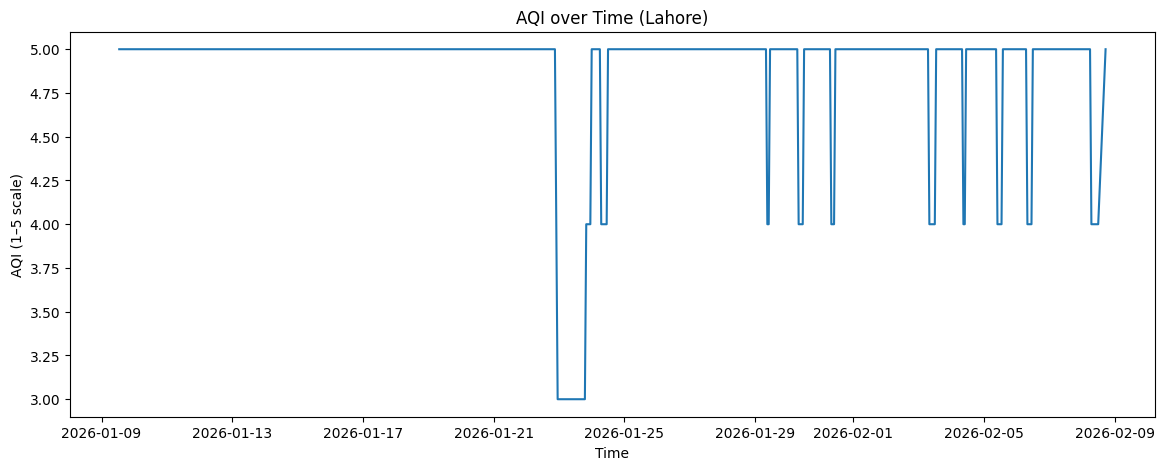

In [9]:
import matplotlib.pyplot as plt

df["timestamp"] = pd.to_datetime(df["timestamp"])
df = df.sort_values("timestamp")

plt.figure(figsize=(14,5))
plt.plot(df["timestamp"], df["aqi"])
plt.title("AQI over Time (Lahore)")
plt.xlabel("Time")
plt.ylabel("AQI (1–5 scale)")
plt.show()


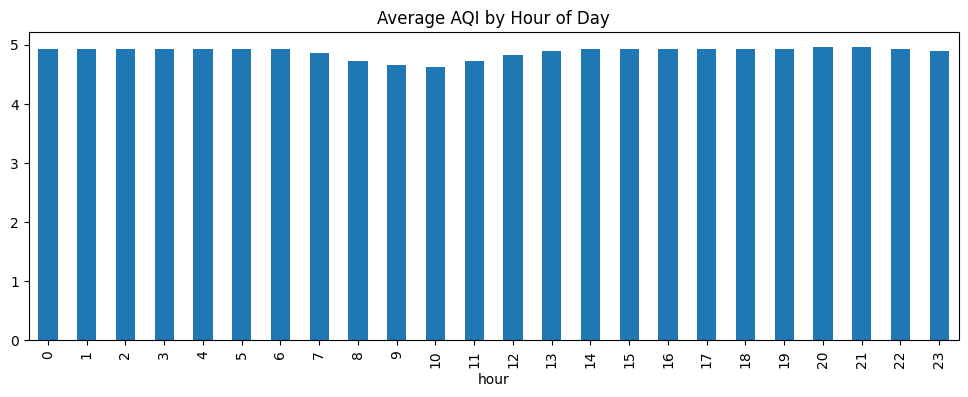

In [10]:
df["hour"] = df["timestamp"].dt.hour

df.groupby("hour")["aqi"].mean().plot(
    kind="bar",
    figsize=(12,4),
    title="Average AQI by Hour of Day"
)
plt.show()
